# Business Problem

A company is running a new marketing campaign and wants to know how many channel that will effective at driving sessions and conversions. The company want at least three marketing campaigns that has same performance at driving sessions and conversions.

# Data Understanding

- `Channel`: platforms that company use to reach company's target audiences online.
- `Sessions`: number of times any user visits company's website.
- `Bounce Rate`: number of users who enter a website and exit without visiting any other page on the website.
- `Pages / Session`: the average number of pages on a website that users access per session.
- `Avg. Session Duration`: average durations any user visits company's website.
- `Conversions`: the process by which website or app visitors are converted into customers who take the desired action.


# Import Depedencies

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import scipy
from scipy import stats
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
%matplotlib inline
filterwarnings('ignore')

Define `LabelEncoder()` as le to make it easy when we want to call the function.

In [116]:
le = LabelEncoder()

Mount Google Drive to Colab.

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read data from mounted Google Drive.

In [118]:
df = pd.read_csv('/content/drive/MyDrive/Data Analyst Science/Marketing Campaign dataset/digital_campaign_Data.csv')

# Exploratory Data Analysis

In [119]:
df.head()

,Channel,Date,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Conversions
0,Social,1/1/2022,14,11,18,0.00,2.22,0.00,0
1,Referral,1/1/2022,11,9,12,0.00,1.58,0.01,0
2,Organic Search,1/1/2022,150,133,173,0.05,1.11,0.00,0
3,Paid,1/1/2022,15,12,20,0.20,1.00,0.00,0
4,Social,1/2/2022,20,16,21,0.10,1.00,0.00,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Channel                1118 non-null   object 
 1   Date                   1118 non-null   object 
 2   Users                  1118 non-null   int64  
 3   New Users              1118 non-null   int64  
 4   Sessions               1118 non-null   int64  
 5   Bounce Rate            1118 non-null   float64
 6   Pages / Session        1118 non-null   float64
 7   Avg. Session Duration  1118 non-null   float64
 8   Conversions            1118 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 78.7+ KB


From the information above, we can see that there is 8 variable in the dataset which contain 2 categorical variables and 7 numerical variables.

In [121]:
df.isna().sum()

Channel                  0
Date                     0
Users                    0
New Users                0
Sessions                 0
Bounce Rate              0
Pages / Session          0
Avg. Session Duration    0
Conversions              0
dtype: int64

There is no missing value, so we don't have to handling missing value.

In [122]:
df.duplicated().sum()

0

There is no duplicated value, so we don't have to handling duplicated value.

Then, we will check what kind of channel that company use for marketing campaign.

In [123]:
df['Channel'].unique()

array(['Social', 'Referral', 'Organic Search', 'Paid', '(Other)'],
      dtype=object)

There are 5 channel that will be use as marketing campaign for the company. In order to analyze the channel, we have to convert type of marketing campaign into numerical variables. To do that, we will use `LabelEncoder()`.

In [124]:
df['Channel'] = le.fit_transform(df['Channel'])
df['Channel'].unique()

array([4, 3, 1, 2, 0])

In [125]:
le.inverse_transform(df['Channel'].unique())

array(['Social', 'Referral', 'Organic Search', 'Paid', '(Other)'],
      dtype=object)

After converting the channel to a numerical variable, we may plot the distribution of each numerical variable to determine the distribution's skewness.

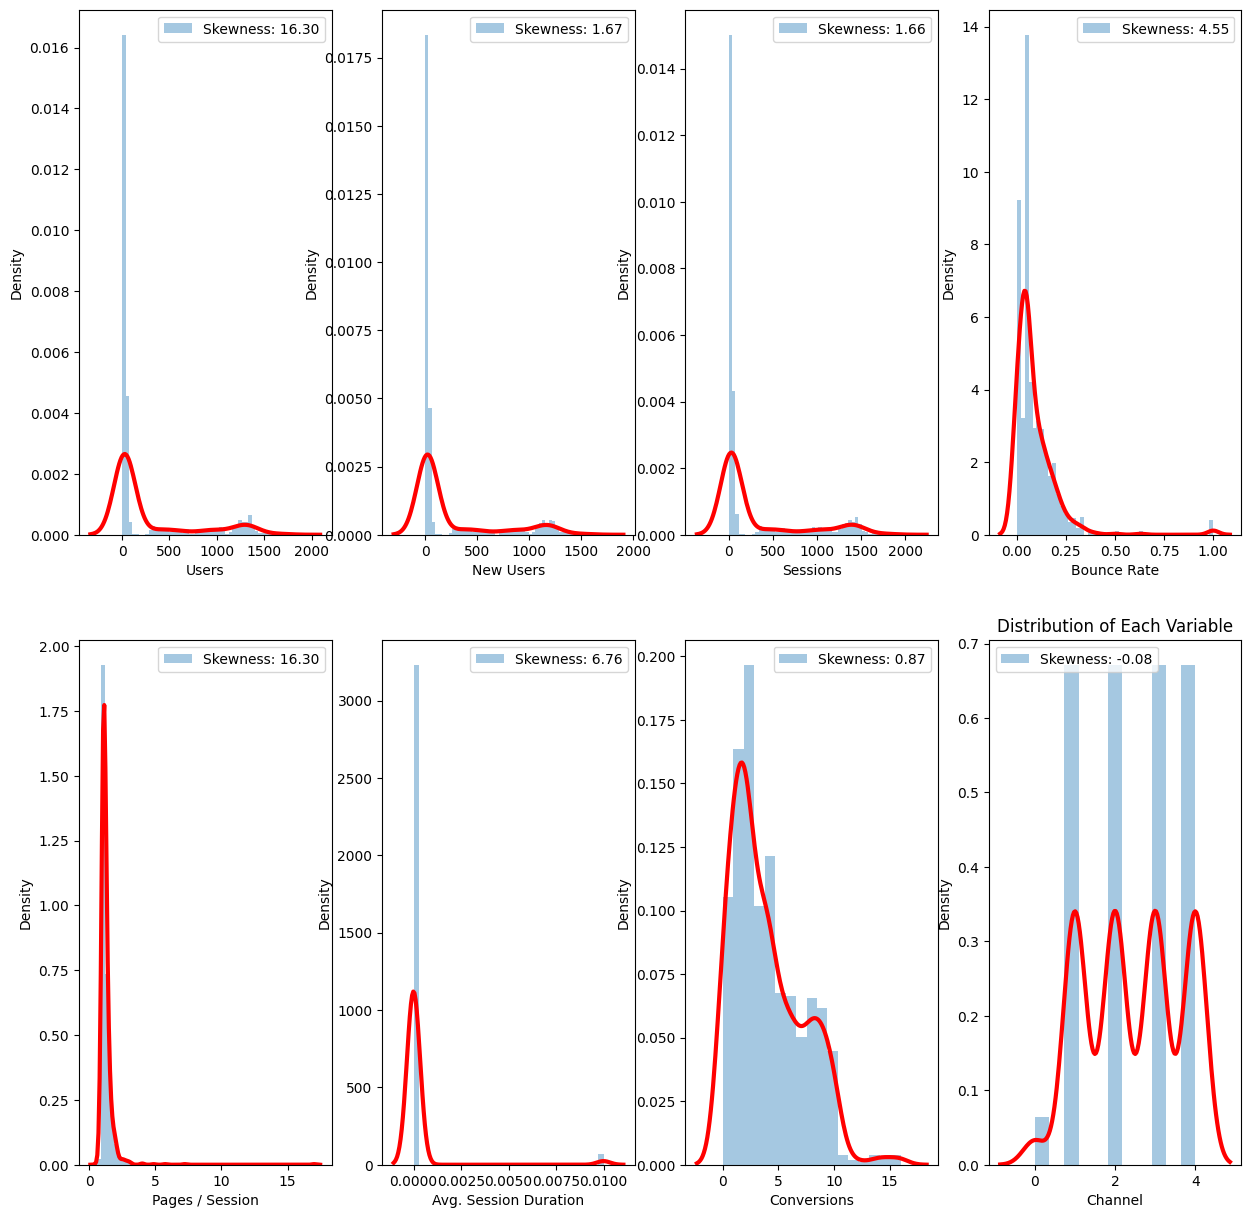

In [149]:
f, axes = plt.subplots(2,4, figsize=(15, 15))

a = sns.distplot(df["Users"], label="Skewness: %.2f"%(df["Pages / Session"].skew()),kde_kws = {"color":"r", "lw":3}, ax = axes[0][0])
b = sns.distplot(df["New Users"], label="Skewness: %.2f"%(df["New Users"].skew()),kde_kws = {"color":"r", "lw":3}, ax = axes[0][1])
c = sns.distplot(df["Sessions"], label="Skewness: %.2f"%(df["Sessions"].skew()), kde_kws = {"color":"r", "lw":3}, ax = axes[0][2])
d = sns.distplot(df["Bounce Rate"], label="Skewness: %.2f"%(df["Bounce Rate"].skew()), kde_kws = {"color":"r", "lw":3}, ax = axes[0][3])
e = sns.distplot(df["Pages / Session"], label="Skewness: %.2f"%(df["Pages / Session"].skew()), kde_kws = {"color":"r", "lw":3}, ax = axes[1][0])
f = sns.distplot(df["Avg. Session Duration"], label="Skewness: %.2f"%(df["Avg. Session Duration"].skew()), kde_kws = {"color":"r", "lw":3}, ax = axes[1][1])
g = sns.distplot(df["Conversions"], label="Skewness: %.2f"%(df["Conversions"].skew()), kde_kws = {"color":"r", "lw":3}, ax = axes[1][2])
h = sns.distplot(df["Channel"], label="Skewness: %.2f"%(df["Channel"].skew()), kde_kws = {"color":"r", "lw":3}, ax = axes[1][3])
a.legend(), b.legend(), c.legend(), d.legend(), e.legend(), f.legend(), g.legend(), h.legend()

plt.show()

Based on the distribution plot above, it can be seen that all distributions have a high skewness. So, we have to handle the skewness to prevent bias and to keep reliability of the data when we perform hypothesis testing.

Before we handle skewed data, we can analyze several variable to find out the correlation between each variable. First, we can find out the growth of all users by channel.

In [177]:
total_users = df['New Users'] + df['Users']

plt.figure(figsize=(8,6))
fig = px.line(df, x = "Date", y = total_users, color = 'Channel', title='Overall Users Growth by Channel')
fig.show()

<Figure size 800x600 with 0 Axes>

From the plot above, we can see that `Organic Search` channel dominate overall user growth.

In [181]:
plt.figure(figsize=(8,6))

fig = px.scatter(df, y="Sessions", x='Date', color = 'Channel', title='Sessions Trend by Channel')
fig.show()

<Figure size 800x600 with 0 Axes>

Based on the plot above, `Referral` Channel has least session compared with the others.

In [179]:
plt.figure(figsize=(8,6))

fig = px.scatter(df, y="Conversions", x='Date', color = 'Channel', title='Conversions Trend by Channel')
fig.show()

<Figure size 800x600 with 0 Axes>

From plot above, we can see that the highest conversions in one day is 16 and happened several time, also all of them happened in `Organic Search` channel.

# Data Preprocessing

### Handling Skewed Data

We will apply the `Box Cox Transformation` to deal with skewed data. Since the data we have is all positive, we can apply this functions.

In [144]:
# Users
boxcox_users = df["Users"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
boxcox_users = stats.boxcox(boxcox_users)
boxcox_users = pd.Series(boxcox_users[0])

# New Users
boxcox_newusers = df["New Users"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
boxcox_newusers = stats.boxcox(boxcox_newusers)
boxcox_newusers = pd.Series(boxcox_newusers[0])

# Sessions
boxcox_sessions = df["Sessions"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
boxcox_sessions= stats.boxcox(boxcox_sessions)
boxcox_sessions= pd.Series(boxcox_sessions[0])

# Bounce Rate
boxcox_bounce = df["Bounce Rate"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
boxcox_bounce = stats.boxcox(boxcox_bounce)
boxcox_bounce = pd.Series(boxcox_bounce[0])

# Pages / Session
boxcox_page = df["Pages / Session"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
boxcox_page = stats.boxcox(boxcox_page)
boxcox_page = pd.Series(boxcox_page[0])

# Conversions
boxcox_conversions = df["Conversions"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
boxcox_conversions = stats.boxcox(boxcox_conversions)
boxcox_conversions = pd.Series(boxcox_conversions[0])

### Plotting the result

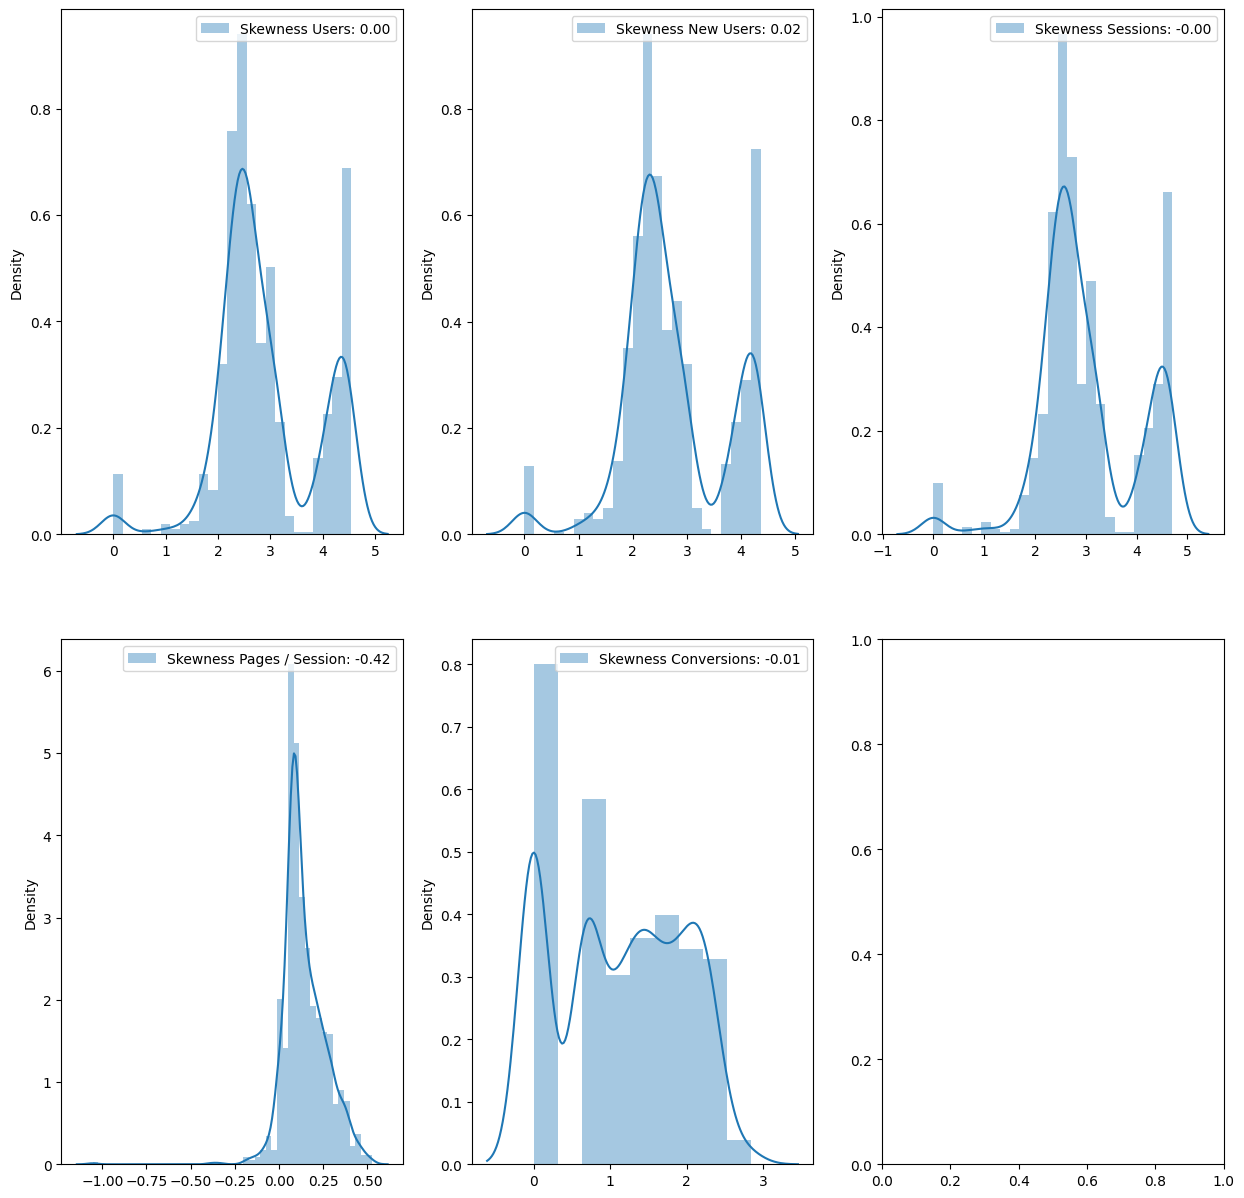

In [155]:
f, axes = plt.subplots(2,3, figsize=(15, 15))

a = sns.distplot(boxcox_users, label="Skewness Users: %.2f"%(boxcox_users.skew()), ax = axes[0][0])
b = sns.distplot(boxcox_newusers, label="Skewness New Users: %.2f"%(boxcox_newusers.skew()), ax = axes[0][1])
c = sns.distplot(boxcox_sessions, label="Skewness Sessions: %.2f"%(boxcox_sessions.skew()), ax = axes[0][2])
d = sns.distplot(boxcox_page, label="Skewness Pages / Session: %.2f"%(boxcox_page.skew()), ax = axes[1][0])
e = sns.distplot(boxcox_conversions, label="Skewness Conversions: %.2f"%(boxcox_conversions.skew()), ax = axes[1][1])
a.legend(), b.legend(), c.legend(), d.legend(), e.legend()

plt.show()

From the plot above we can see that, we already reduce the skewness of the data using `Box Cox Transformation`. So, we can do hypothesis testing to the data.

# Hypothesis Testing

We will use 'Kruskal Wallis H' to test the data in this hypothesis testing because the data still has skewness and 'Kruskal Wallis H' is a hypothesis test that does not take parameters like the 'ANOVA' test. As a result, we can evaluate it immediately without performing a normalcy test.

**Metric**: Sessions

- **Null hypothesis (H0)**: The median sessions is the same for all channels.

- **Alternative hypothesis (H1)**: The median sessions is not the same for at least two channels.

In [170]:
result = stats.kruskal(df['Channel'], boxcox_sessions)
pval = result[1]
alpha = 0.05
if pval < alpha:
    print("Probability: ", pval)
    print("REJECT HO Assupmtion / ACCEPT H1 Assumption")
    print("Hence, The median sessions rate is not the same for at least two channels.")

else:
    print("Probability: ", pval)
    print("ACCEPT H0 Assupmtion / REJECT H1 Assumption")
    print("Hence, The median sessions rate is the same for all channels.")

Probability:  1.0198433093301551e-33
REJECT HO Assupmtion / ACCEPT H1 Assumption
Hence, The median sessions rate is not the same for at least two channels.


**Metric**: Conversions

- **Null hypothesis (H0)**: The median conversions is the same for all channels.

- **Alternative hypothesis (H1)**: The median conversions is not the same for at least two channels.

In [171]:
result = stats.kruskal(df['Channel'], boxcox_conversions)
pval = result[1]
alpha = 0.05
if pval < alpha:
    print("Probability: ", pval)
    print("REJECT HO Assupmtion / ACCEPT H1 Assumption")
    print("Hence, The median conversions rate is not the same for at least two channels.")

else:
    print("Probability: ", pval)
    print("ACCEPT H0 Assupmtion / REJECT H1 Assumption")
    print("Hence, The median conversions rate is the same for all channels.")

Probability:  6.671768934224414e-134
REJECT HO Assupmtion / ACCEPT H1 Assumption
Hence, The median conversions rate is not the same for at least two channels.


# Conclusion

If the company still desire to have at least **three marketing campaigns with the same performance**, they should **increase the performance** of their marketing campaigns, particularly the top-2 and top-3 marketing campaigns.